In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from pathlib import Path

In [2]:
path = Path(Path.cwd())
ficheiros_out = path / 'ficheiros' 
imagens_out = path / 'imagens' 
tabelas_resultados_out = path / 'tabelas_resultados' 

geral_df = pd.read_excel(ficheiros_out / 'cassini_geral.xlsx')
atr_df = pd.read_excel(ficheiros_out / 'cassini_atr.xlsx')
wtr_df = pd.read_excel(ficheiros_out / 'cassini_wtr.xlsx')
obl_df = pd.read_excel(ficheiros_out / 'cassini_obl.xlsx')

In [3]:
#remoção de outliers

data = geral_df['C_Ant_Ast'].to_numpy().reshape(-1, 1)
z_scores = np.abs((data - data.mean()) / data.std())
threshold = 2
outliers = z_scores > threshold
geral_df_sem_outliers = geral_df[~outliers.flatten()]

geral_df_sem_outliers.to_excel(ficheiros_out / 'cassini_geral_sem_outliers.xlsx')

atr_df_sem_outliers = geral_df_sem_outliers[geral_df_sem_outliers['category_Ant'] == 'ATR']
atr_df_sem_outliers.to_excel(ficheiros_out / 'cassini_atr_sem_outliers.xlsx')

wtr_df_sem_outliers = geral_df_sem_outliers[geral_df_sem_outliers['category_Ant'] == 'WTR']
wtr_df_sem_outliers.to_excel(ficheiros_out / 'cassini_wtr_sem_outliers.xlsx')

obl_df_sem_outliers = geral_df_sem_outliers[geral_df_sem_outliers['category_Ant'] == 'OBL']
obl_df_sem_outliers.to_excel(ficheiros_out / 'cassini_obl_sem_outliers.xlsx')

total_outliers = np.sum(outliers)
total_data_points = len(geral_df)
percentage_total_outliers = (total_outliers / total_data_points) * 100

percentage_outliers = {}
for category in ['ATR', 'WTR', 'OBL']:
    category_data = geral_df[geral_df['category_Ant'] == category]
    category_outliers = np.sum(outliers[geral_df['category_Ant'] == category])
    total_count = len(category_data)
    if total_count > 0:
        percentage_outliers[category] = (category_outliers / total_count) * 100

print('Total percentage of outliers:')
print(percentage_total_outliers)
print("Percentage of outliers in each category:")
print(percentage_outliers)

Total percentage of outliers:
3.9538714991762767
Percentage of outliers in each category:
{'ATR': 3.286384976525822, 'WTR': 4.377104377104377, 'OBL': 4.123711340206185}


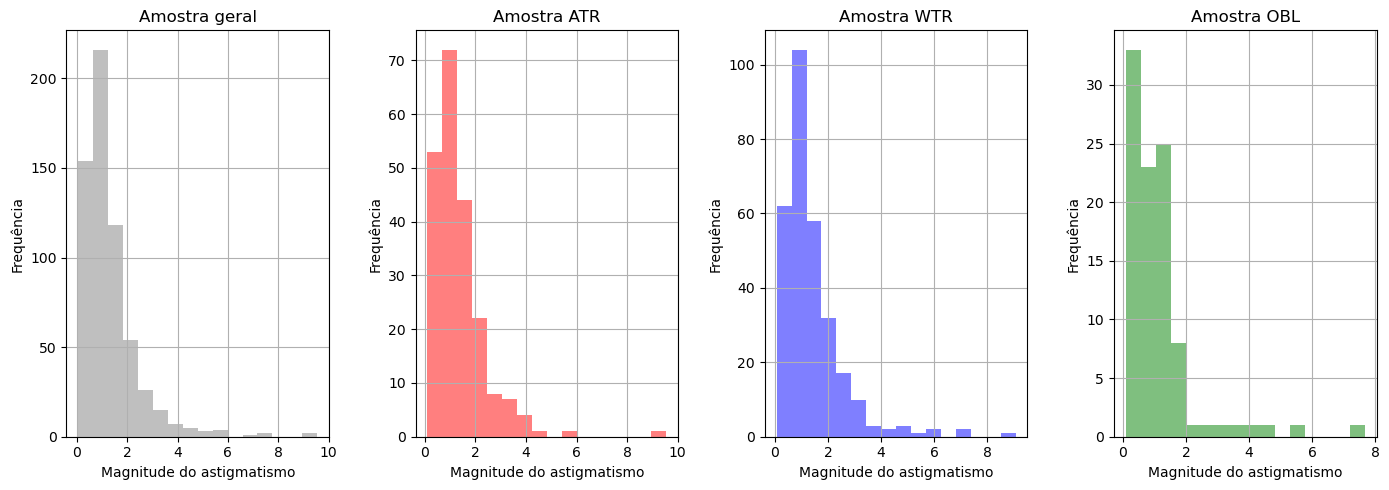

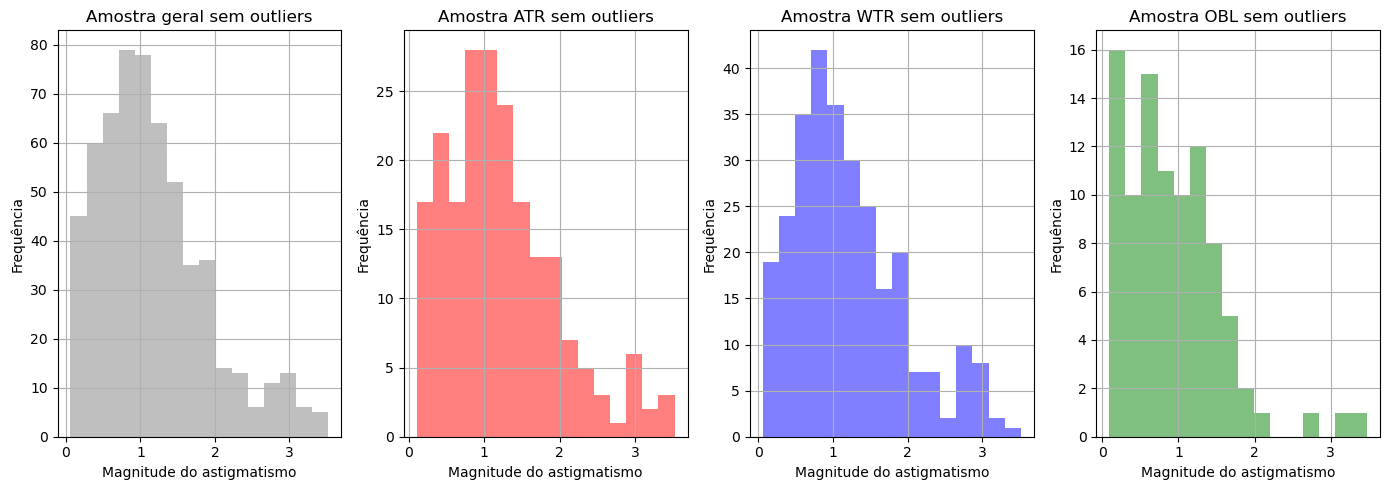

In [4]:
#Visualizar distribuição de magnitude de astigmatismo anterior com e sem outliers

plt.figure(figsize=(14, 5))

plt.subplot(1, 4, 1)
plt.hist(geral_df['C_Ant_Ast'], bins=16, alpha=0.5, color='grey')
plt.xlabel('Magnitude do astigmatismo')
plt.ylabel('Frequência')
plt.title('Amostra geral')
plt.grid()

plt.subplot(1, 4, 2)
plt.hist(atr_df['C_Ant_Ast'], bins=16, alpha=0.5, color='red')
plt.xlabel('Magnitude do astigmatismo')
plt.ylabel('Frequência')
plt.title('Amostra ATR')
plt.grid()

plt.subplot(1, 4, 3)
plt.hist(wtr_df['C_Ant_Ast'], bins=16, alpha=0.5, color='blue')
plt.xlabel('Magnitude do astigmatismo')
plt.ylabel('Frequência')
plt.title('Amostra WTR')
plt.grid()

plt.subplot(1, 4, 4)
plt.hist(obl_df['C_Ant_Ast'], bins=16, alpha=0.5, color='green')
plt.xlabel('Magnitude do astigmatismo')
plt.ylabel('Frequência')
plt.title('Amostra OBL')
plt.grid()

plt.tight_layout()
plt.savefig(imagens_out / 'magnitude_astigmatismo_anterior', dpi=300)
plt.show()

plt.figure(figsize=(14, 5))

plt.subplot(1, 4, 1)
plt.hist(geral_df_sem_outliers['C_Ant_Ast'], bins=16, alpha=0.5, color='grey')
plt.xlabel('Magnitude do astigmatismo')
plt.ylabel('Frequência')
plt.title('Amostra geral sem outliers')
plt.grid()

plt.subplot(1, 4, 2)
plt.hist(atr_df_sem_outliers['C_Ant_Ast'], bins=16, alpha=0.5, color='red')
plt.xlabel('Magnitude do astigmatismo')
plt.ylabel('Frequência')
plt.title('Amostra ATR sem outliers')
plt.grid()

plt.subplot(1, 4, 3)
plt.hist(wtr_df_sem_outliers['C_Ant_Ast'], bins=16, alpha=0.5, color='blue')
plt.xlabel('Magnitude do astigmatismo')
plt.ylabel('Frequência')
plt.title('Amostra WTR sem outliers')
plt.grid()

plt.subplot(1, 4, 4)
plt.hist(obl_df_sem_outliers['C_Ant_Ast'], bins=16, alpha=0.5, color='green')
plt.xlabel('Magnitude do astigmatismo')
plt.ylabel('Frequência')
plt.title('Amostra OBL sem outliers')
plt.grid()

plt.tight_layout()
plt.savefig(imagens_out / 'magnitude_astigmatismo_anterior_sem_outliers', dpi=300)
plt.show()


In [5]:
def calculate_percentages(column):
    counts = column.value_counts()
    total = len(column)
    percentages = (counts / total) * 100
    return percentages

percentages_ant = calculate_percentages(geral_df['category_Ant'])
percentages_tca = calculate_percentages(geral_df['category_TCA'])
percentages_post = calculate_percentages(geral_df['category_Post'])

results = pd.DataFrame({
    'Anterior': percentages_ant,
    'Posterior': percentages_post,
    'TCA': percentages_tca
}).transpose()

results.to_excel(tabelas_resultados_out / 'categoria_por_parametro.xlsx')
print('Categoria por pârametro')
print(results)

#####################

def calculate_tca_percentages(ant_value):
    filtered_df = geral_df[geral_df['category_Ant'] == ant_value]
    tca_counts = filtered_df['category_TCA'].value_counts()
    total_filtered = len(filtered_df)
    tca_percentages = (tca_counts / total_filtered) * 100
    return tca_percentages

results = pd.DataFrame({
    'ATR': calculate_tca_percentages('ATR'),
    'WTR': calculate_tca_percentages('WTR'),
    'OBL': calculate_tca_percentages('OBL')
}).transpose()

results.to_excel(tabelas_resultados_out / 'categoria_anterior_vs_TCA.xlsx')

print('Ant vs TCA')
print(results)

#################

def calculate_tca_percentages(ant_value):
    filtered_df = geral_df[geral_df['category_Ant'] == ant_value]
    tca_counts = filtered_df['category_Post'].value_counts()
    total_filtered = len(filtered_df)
    tca_percentages = (tca_counts / total_filtered) * 100
    return tca_percentages

results = pd.DataFrame({
    'ATR': calculate_tca_percentages('ATR'),
    'WTR': calculate_tca_percentages('WTR'),
    'OBL': calculate_tca_percentages('OBL')
}).transpose()

results.to_excel(tabelas_resultados_out / 'categoria_anterior_vs_posterior.xlsx')
print('Ant vs Post')
print(results)

########################

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_v_ant_tca = cramers_v(geral_df['category_Ant'], geral_df['category_TCA'])
cramers_v_ant_post = cramers_v(geral_df['category_Ant'], geral_df['category_Post'])
cramers_v_tca_post = cramers_v(geral_df['category_TCA'], geral_df['category_Post'])

correlation_results = pd.DataFrame({
    'category_Ant': ['-', cramers_v_ant_tca, cramers_v_ant_post],
    'category_TCA': [cramers_v_ant_tca, '-', cramers_v_tca_post],
    'category_Post': [cramers_v_ant_post, cramers_v_tca_post, '-']
}, index=['category_Ant', 'category_TCA', 'category_Post'])

results.to_excel(tabelas_resultados_out / 'correlacao_entre_categorias_parametros.xlsx')
print(correlation_results)


Categoria por pârametro
                 ATR        OBL        WTR
Anterior   35.090610  15.980231  48.929160
Posterior  10.378913  18.286656  71.334432
TCA        39.373970  20.428336  40.197694
Ant vs TCA
           ATR        OBL        WTR
ATR  95.774648   4.225352        NaN
WTR   3.703704  14.478114  81.818182
OBL  24.742268  74.226804   1.030928
Ant vs Post
           ATR        OBL        WTR
ATR  23.004695  22.065728  54.929577
WTR   2.693603  11.447811  85.858586
OBL   6.185567  30.927835  62.886598
              category_Ant category_TCA category_Post
category_Ant             -     0.755097      0.261557
category_TCA      0.755097            -        0.1592
category_Post     0.261557       0.1592             -


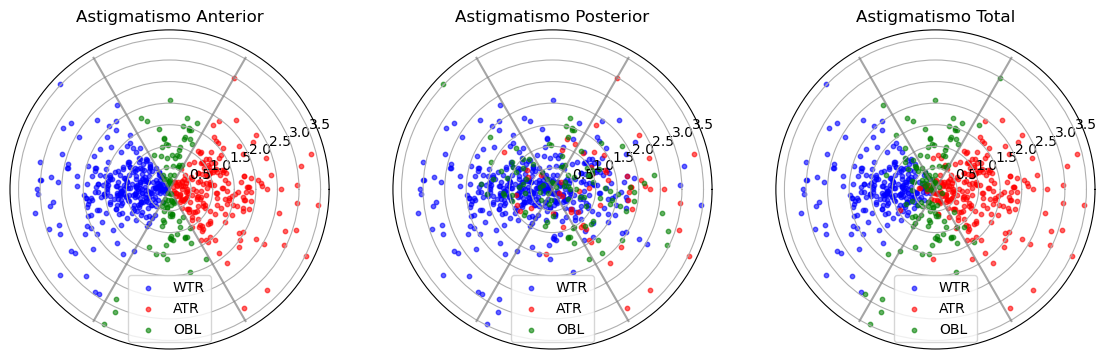

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(14, 5), subplot_kw={'projection': 'polar'})

color_map = {'WTR': 'blue', 'ATR': 'red', 'OBL': 'green'}

for category in ['WTR', 'ATR', 'OBL']:
    axs[0].scatter(geral_df_sem_outliers[geral_df_sem_outliers['category_Ant'] == category]['C_Ant_Axis'] * np.pi/180*2,
                   geral_df_sem_outliers[geral_df_sem_outliers['category_Ant'] == category]['C_Ant_Ast'],
                   color=color_map[category], label=category, alpha=0.6, s=10)

axs[0].set_title("Astigmatismo Anterior")
axs[0].legend()

for category in ['WTR', 'ATR', 'OBL']:
    axs[1].scatter(geral_df_sem_outliers[geral_df_sem_outliers['category_Post'] == category]['C_Ant_Axis'] * np.pi/180*2,
                   geral_df_sem_outliers[geral_df_sem_outliers['category_Post'] == category]['C_Ant_Ast'],
                   color=color_map[category], label=category, alpha=0.6, s=10)

axs[1].set_title("Astigmatismo Posterior")
axs[1].legend()

for category in ['WTR', 'ATR', 'OBL']:
    axs[2].scatter(geral_df_sem_outliers[geral_df_sem_outliers['category_TCA'] == category]['C_Ant_Axis'] * np.pi/180*2,
                   geral_df_sem_outliers[geral_df_sem_outliers['category_TCA'] == category]['C_Ant_Ast'],
                   color=color_map[category], label=category, alpha=0.6, s=10)

axs[2].set_title("Astigmatismo Total")
axs[2].legend()

angles = [60, 120, 240, 300]
for ax in axs:
    max_radius = max([np.max(geral_df_sem_outliers[geral_df_sem_outliers[col] == category]['C_Ant_Ast']) for col in ['category_TCA', 'category_Ant', 'category_Post'] for category in ['WTR', 'ATR', 'OBL']])
    for angle in angles:
        ax.plot([angle*np.pi/180, angle*np.pi/180], [0, max_radius], linestyle='-', color='grey', alpha=0.7)
    ax.set_xticks([])

plt.savefig(imagens_out / 'categorias_cor_todos_distribuição_anterior.png', dpi=300)
plt.show()

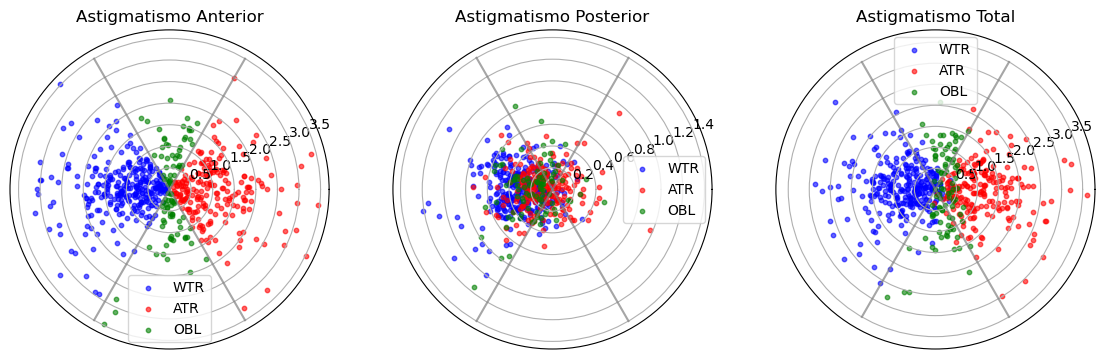

In [26]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 3, figsize=(14, 5), subplot_kw={'projection': 'polar'})

color_map = {'WTR': 'blue', 'ATR': 'red', 'OBL': 'green'}

# Plot for Astigmatismo Anterior
for category in ['WTR', 'ATR', 'OBL']:
    axs[0].scatter(geral_df_sem_outliers[geral_df_sem_outliers['category_Ant'] == category]['C_Ant_Axis'] * np.pi/180*2,
                   geral_df_sem_outliers[geral_df_sem_outliers['category_Ant'] == category]['C_Ant_Ast'],
                   color=color_map[category], label=category, alpha=0.6, s=10)
for angle in angles:
        axs[0].plot([angle * np.pi/180, angle * np.pi/180], [0, 3.5], linestyle='-', color='grey', alpha=0.7)
axs[0].set_title("Astigmatismo Anterior")
axs[0].legend()
axs[0].set_xticks([])

# Plot for Astigmatismo Posterior (with max radius set to a small value)
for category in ['WTR', 'ATR', 'OBL']:
    axs[1].scatter(geral_df_sem_outliers[geral_df_sem_outliers['category_Ant'] == category]['C_Post_Axis'] * np.pi/180*2,
                   geral_df_sem_outliers[geral_df_sem_outliers['category_Ant'] == category]['C_Post_Ast']*(-1),
                   color=color_map[category], label=category, alpha=0.6, s=10)
for angle in angles:
        axs[1].plot([angle * np.pi/180, angle * np.pi/180], [0, 1.4], linestyle='-', color='grey', alpha=0.7)
axs[1].set_title("Astigmatismo Posterior")
axs[1].legend()
#axs[1].set_ylim(-1.4, 0)  # Set to a small range
axs[1].set_xticks([])

# Plot for Astigmatismo Total
for category in ['WTR', 'ATR', 'OBL']:
    axs[2].scatter(geral_df_sem_outliers[geral_df_sem_outliers['category_Ant'] == category]['C_TCA_Axis'] * np.pi/180*2,
                   geral_df_sem_outliers[geral_df_sem_outliers['category_Ant'] == category]['C_TCA_Ast'],
                   color=color_map[category], label=category, alpha=0.6, s=10)
for angle in angles:
        axs[2].plot([angle * np.pi/180, angle * np.pi/180], [0, 3.5], linestyle='-', color='grey', alpha=0.7)
axs[2].set_title("Astigmatismo Total")
axs[2].legend()
axs[2].set_xticks([])

plt.savefig(imagens_out / 'categorias_cor_anterior_distribuição_todos.png', dpi=300)
plt.show()


In [9]:
# #Visualizar dados
# color_map = {'WTR': 'blue', 'ATR': 'red', 'OBL': 'green'}

# fig, axs = plt.subplots(1, 3, figsize=(14, 5), subplot_kw={'projection': 'polar'})

# axs[0].scatter(geral_df[geral_df['category_TCA'] == 'WTR']['C_TCA_Axis'] * np.pi/180*2, geral_df[geral_df['category_TCA'] == 'WTR']['C_TCA_Ast'], color='blue', label='A favor da regra', alpha=0.8)
# axs[0].scatter(geral_df[geral_df['category_TCA'] == 'ATR']['C_TCA_Axis'] * np.pi/180*2, geral_df[geral_df['category_TCA'] == 'ATR']['C_TCA_Ast'], color='red', label='Contra a regra', alpha=0.8)
# axs[0].scatter(geral_df[geral_df['category_TCA'] == 'OBL']['C_TCA_Axis'] * np.pi/180*2, geral_df[geral_df['category_TCA'] == 'OBL']['C_TCA_Ast'], color='green', label='Oblíquo', alpha=0.8)

# axs[0].set_title("Astigmatismo Total da Cornea")
# axs[0].legend()

# axs[1].scatter(geral_df[geral_df['category_Ant'] == 'WTR']['C_Ant_Axis'] * np.pi/180*2, geral_df[geral_df['category_Ant'] == 'WTR']['C_Ant_Ast'], color='blue', label='A favor da regra', alpha=0.8)
# axs[1].scatter(geral_df[geral_df['category_Ant'] == 'ATR']['C_Ant_Axis'] * np.pi/180*2, geral_df[geral_df['category_Ant'] == 'ATR']['C_Ant_Ast'], color='red', label='Contra a regra', alpha=0.8)
# axs[1].scatter(geral_df[geral_df['category_Ant'] == 'OBL']['C_Ant_Axis'] * np.pi/180*2, geral_df[geral_df['category_Ant'] == 'OBL']['C_Ant_Ast'], color='green', label='Oblíquo', alpha=0.8)

# axs[1].set_title("Astigmatismo Anterior")
# axs[1].legend()


# axs[2].scatter(geral_df[geral_df['category_Post'] == 'WTR']['C_Post_Axis'] * np.pi/180*2, geral_df[geral_df['category_Post'] == 'WTR']['C_Post_Ast'], color='blue', label='A favor da regra', alpha=0.8)
# axs[2].scatter(geral_df[geral_df['category_Post'] == 'ATR']['C_Post_Axis'] * np.pi/180*2, geral_df[geral_df['category_Post'] == 'ATR']['C_Post_Ast'], color='red', label='Contra a regra', alpha=0.8)
# axs[2].scatter(geral_df[geral_df['category_Post'] == 'OBL']['C_Post_Axis'] * np.pi/180*2, geral_df[geral_df['category_Post'] == 'OBL']['C_Post_Ast'], color='green', label='Oblíquo', alpha=0.8)

# axs[2].set_title("Astigmatismo Posterior")
# axs[2].legend()
# plt.savefig('/Users/constancacachim/Desktop/golp_dados/imagens/geral', dpi=300)
# plt.show()